
# 와인 품질 데이터 셋
## 기술 통계

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm
%matplotlib inline

# 데이터셋을 팬더스 데이터프레임으로 읽기
wine = pd.read_csv('winequality.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.head())

# 변수별 요약통계 표시
print(wine.describe())

# 유일값 찾기
print(sorted(wine.quality.unique()))

# 빈도 계산
print(wine.quality.value_counts())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

## 그룹화, 히스토그램, t 검정

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64
     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


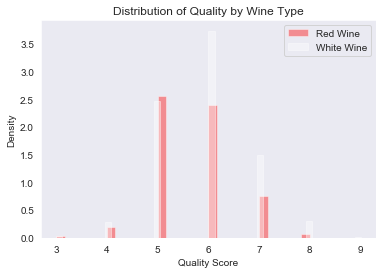

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686 pvalue: 0.0000


In [5]:
# 와인 종류에 따른 기술통계를 출력하기
print(wine.groupby('type')[['quality']].describe().unstack('type'))

# 특정 사분위수 계산하기
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

# 와인 종류에 따른 품질의 분포 확인하기

red_wine = wine.ix[wine['type']=='red', 'quality']
white_wine = wine.ix[wine['type']=='white', 'quality']

sns.set_style('dark')
print(sns.distplot(red_wine, \
                  norm_hist=True, kde=False, color='red', \
                   label='Red Wine'))
print(sns.distplot(white_wine, \
                  norm_hist=True, kde=False, color='white', \
                   label='White Wine'))
sns.utils.axlabel('Quality Score', 'Density')

plt.title('Distribution of Quality by Wine Type')
plt.legend()
plt.show()

# 와인 종류에 따라 품질의 차이 검정

print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

## 상관관계 분석

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

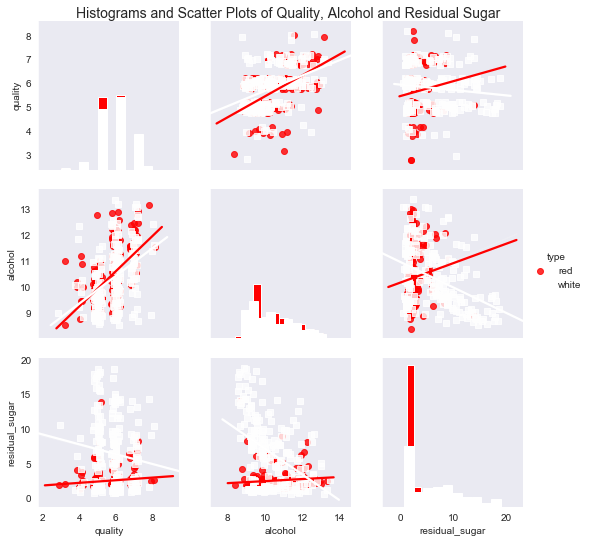

In [6]:
# 모든 변수 쌍 사이의 상관계수 구하기
print(wine.corr())

# 변수 간 관계 살펴보기
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]

reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
wine_sample = pd.concat([reds_sample, whites_sample])
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1., 0.)

print(pd.crosstab(wine.in_sample, wine.type, margins=True))

sns.set_style('dark')

g = sns.pairplot(wine_sample, kind='reg', plot_kws={'ci': False, 'x_jitter': 0.25, \
                                                    'y_jitter': 0.25}, \
                hue='type', diag_kind='hist', diag_kws={'bins': 10, 'alpha': 1.0}, \
                palette=dict(red='red', white='white'), \
                markers=['o', 's'], vars=['quality', 'alcohol', 'residual_sugar'])

print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol and Residual Sugar', \
            fontsize=14, horizontalalignment='center', \
            verticalalignment='top', x=0.5, y=0.999)
plt.show()


## 최소제곱법을 이용한 선형회귀 분석

In [7]:
my_formula = 'quality ~ alcohol + chlorides + citric_acid + \
density + fixed_acidity + free_sulfur_dioxide + pH + \
residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

lm = ols(my_formula, data=wine).fit()
# 또는 lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit()

print(lm.summary())
print('\nQuantities you can extract from the result:\n%s' % dir(lm))
print('\nCoefficients:\n%s' % lm.params)
print('\nCoefficients Std Errors:\n%s' % lm.bse)
print('\nAdj. R-squared\n%.2f' % lm.rsquared_adj)
print('\nF-statistic: %.1f P-value: %2f' % (lm.fvalue, lm.f_pvalue))
print('\nNumber of obs: %d Number of fitted values: %s' % (lm.nobs, \
                                                           len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:24:34   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

## 회귀계수의 해석

종속변수에 해당하는 와인 품질과 와인의 11가지 특성을 나타내는 독립변수 사이의

관계를 알고 싶다면 이 모형에서 추정된 회귀계수를 해석할 필요가 있다.

각각의 회귀계수는 다른 독립 변수는 고정되어 있고 특정 독립변수가 1단위 변할 때

종속변수가 변화하는 평균을 의미한다.

알코올을 예로 들자면 (회귀계수 0.267) 모든 독립변수가 동일한 두 와인을 비교할 때

한 와인의 알코올이 1단위 증가하면 그 와인의 품질은 평균적으로 약 0.267점 증가한다는 뜻이다.

모든 회귀계수의 해석이 필요한 것은 아니다. 예를 들어 절편은 모든 독립변수가 0인 경우에 예측되는 품질이다.

하지만 모든 특성이 0인 와인은 없으므로 절편의 수치 자체는 유의미하지 않다.

## 독립변수의 표준화

In [8]:
# 와인 데이터셋의 quality를 종속변수로 생성

dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = \
    (independent_variables - independent_variables.mean()) / \
        independent_variables.std()
wine_standardized = \
    pd.concat([dependent_variable, independent_variables_standardized], \
              axis=1) # 가로로 합침

# 독립변수 표준화 이후 다시 회귀분석 실시
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:24:36   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

## 예측하기

In [9]:
# 기존 데이터셋의 첫 10개 값을 가지고 새로운 관측값 데이터셋을 만듦
new_observations = wine.ix[wine.index.isin(range(10)), independent_variables.columns]
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score,2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
